# SIFT (Scale-Invariant Feature Transform) Implementation
 

## What is SIFT?
SIFT (Scale-Invariant Feature Transform) is a feature detection algorithm developed by David Lowe in 1999. It's used to detect and describe local features in images. The key properties of SIFT are:
- Scale invariance
- Rotation invariance
- Illumination invariance (partial)
- Viewpoint invariance (partial)

In [ ]:
# Import necessary libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch

## Load Test Images

We'll load two images to detect and match keypoints between them. 

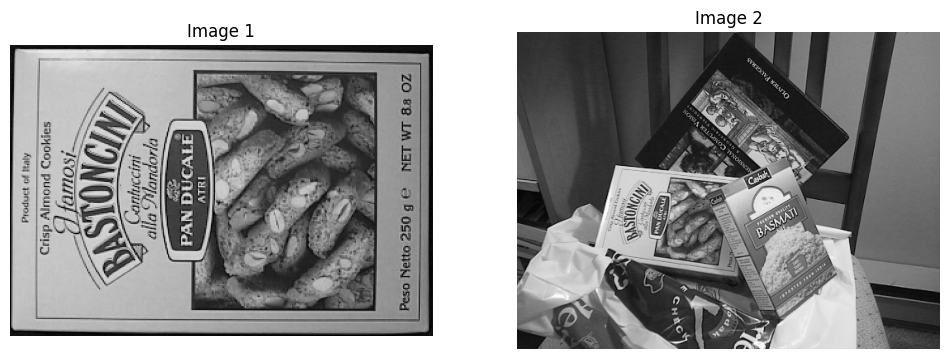

In [19]:
# Load images
img1_color = cv2.imread("image1.jpg")
img2_color = cv2.imread("image2.jpg")

# Convert to RGB for matplotlib
img1_color = cv2.cvtColor(img1_color, cv2.COLOR_BGR2RGB)
img2_color = cv2.cvtColor(img2_color, cv2.COLOR_BGR2RGB)

# Convert to grayscale for SIFT
img1_gray = cv2.cvtColor(img1_color, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2_color, cv2.COLOR_RGB2GRAY)

# Display the images
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img1_color)
plt.title('Image 1'), plt.axis('off')
plt.subplot(122), plt.imshow(img2_color)
plt.title('Image 2'), plt.axis('off')
plt.show()


## Step 1: Detect SIFT Keypoints and Compute Descriptors


In [20]:
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(img1_gray, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2_gray, None)
    
print(f"Number of keypoints in image 1: {len(keypoints1)}")
print(f"Number of keypoints in image 2: {len(keypoints2)}")

Number of keypoints in image 1: 604
Number of keypoints in image 2: 969


## Visualize Detected Keypoints

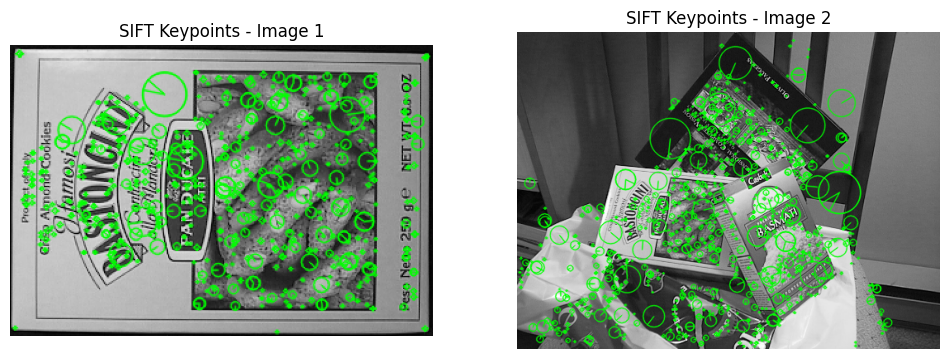

In [21]:
# Draw keypoints on images
img1_kp = cv2.drawKeypoints(img1_gray, keypoints1, None, color=(0, 255, 0), 
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_kp = cv2.drawKeypoints(img2_gray, keypoints2, None, color=(0, 255, 0), 
                            flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Convert to RGB for matplotlib
img1_kp = cv2.cvtColor(img1_kp, cv2.COLOR_BGR2RGB)
img2_kp = cv2.cvtColor(img2_kp, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(img1_kp)
plt.title('SIFT Keypoints - Image 1'), plt.axis('off')
plt.subplot(122), plt.imshow(img2_kp)
plt.title('SIFT Keypoints - Image 2'), plt.axis('off')
plt.show()

## Step 2: Match Keypoints Between Images

We'll use the FLANN (Fast Library for Approximate Nearest Neighbors) based matcher for efficient matching of SIFT descriptors.

In [22]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Convert descriptors to the appropriate format if necessary
if descriptors1 is not None and descriptors2 is not None and len(descriptors1) > 0 and len(descriptors2) > 0:
    descriptors1 = np.float32(descriptors1)
    descriptors2 = np.float32(descriptors2)

    # Find k best matches for each descriptor (k=2)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # Apply Lowe's ratio test
    good_matches = []
    ratio_threshold = 0.75
    for m, n in matches:
        if m.distance < ratio_threshold * n.distance:
            good_matches.append(m)

    print(f"Number of good matches: {len(good_matches)}")
else:
    good_matches = []
    print("No descriptors to match.")


Number of good matches: 79


## Visualize Matches

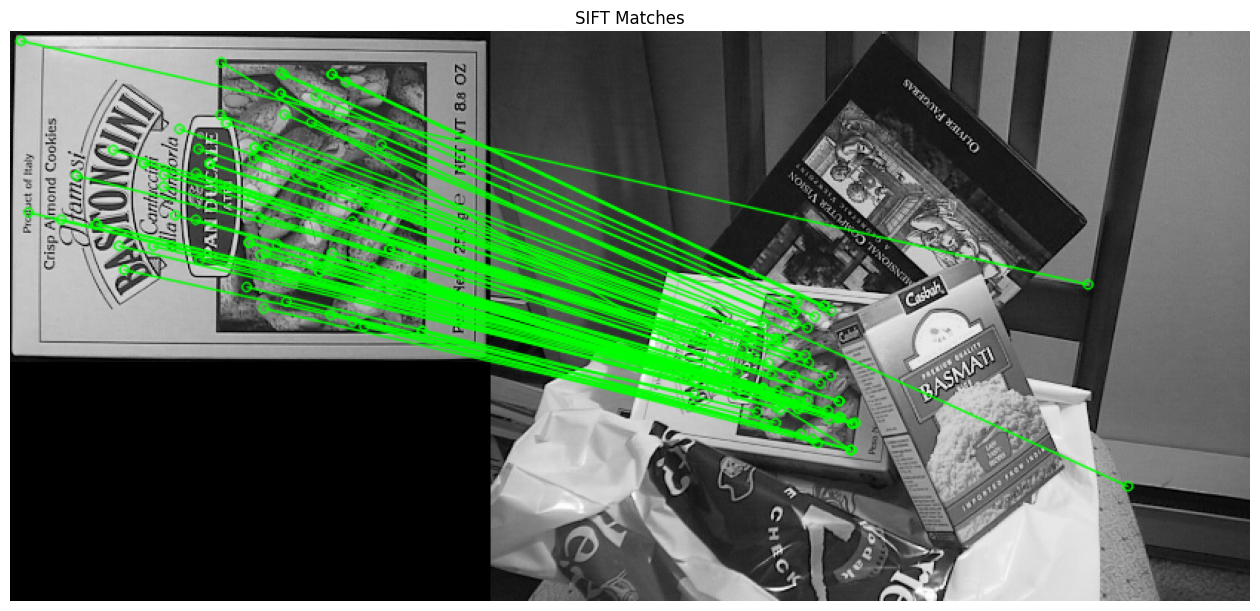

In [17]:
# Limit the number of matches to draw
good_matches = sorted(good_matches, key=lambda x: x.distance)[:100]

# Draw matches
img_matches = cv2.drawMatches(img1_color, keypoints1, img2_color, keypoints2, good_matches, None,
                              matchColor=(0, 255, 0), singlePointColor=(255, 0, 0),
                              flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# Convert to RGB for matplotlib
img_matches = cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB)

# Display the matches
plt.figure(figsize=(16, 9))
plt.imshow(img_matches)
plt.title('SIFT Matches')
plt.axis('off')
plt.show()


## Conclusion

In this notebook, we've implemented the SIFT algorithm for detecting and matching keypoints between two images. The main steps we covered are:

1. Detecting SIFT keypoints and computing descriptors
2. Matching keypoints between images using the FLANN matcher and Lowe's ratio test


The SIFT algorithm has several advantages over other feature detection methods:
- Invariant to scale, rotation, and illumination changes
- Robust to viewpoint changes
- Distinctive feature descriptors that allow for accurate matching

However, SIFT is computationally intensive and might not be the best choice for real-time applications. Alternatives like SURF, ORB, and BRIEF can be more efficient while still providing good results in many cases.